# PANCREATIC CANCER EDA

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

d=pd.read_csv('pancreas.csv')
d.head(5)

,sample_id,patient_cohort,sample_origin,age,sex,stage,benign_sample_diagnosis,plasma_CA19_9,creatinine,LYVE1,REG1B,TFF1,REG1A,diagnosis
0,S1,Cohort1,BPTB,33,F,NaN,NaN,11.7,1.83222,0.893219,52.94884,654.282174,1262.000,1
1,S10,Cohort1,BPTB,81,F,NaN,NaN,NaN,0.97266,2.037585,94.46703,209.488250,228.407,1
2,S100,Cohort2,BPTB,51,M,NaN,NaN,7.0,0.78039,0.145589,102.36600,461.141000,NaN,1
3,S101,Cohort2,BPTB,61,M,NaN,NaN,8.0,0.70122,0.002805,60.57900,142.950000,NaN,1
4,S102,Cohort2,BPTB,62,M,NaN,NaN,9.0,0.21489,0.000860,65.54000,41.088000,NaN,1


In [2]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 590 entries, 0 to 589
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   sample_id                590 non-null    object 
 1   patient_cohort           590 non-null    object 
 2   sample_origin            590 non-null    object 
 3   age                      590 non-null    int64  
 4   sex                      590 non-null    object 
 5   stage                    199 non-null    object 
 6   benign_sample_diagnosis  208 non-null    object 
 7   plasma_CA19_9            350 non-null    float64
 8   creatinine               590 non-null    float64
 9   LYVE1                    590 non-null    float64
 10  REG1B                    590 non-null    float64
 11  TFF1                     590 non-null    float64
 12  REG1A                    306 non-null    float64
 13  diagnosis                590 non-null    int64  
dtypes: float64(6), int64(2), o

In [3]:
d.isna().any()

sample_id                  False
patient_cohort             False
sample_origin              False
age                        False
sex                        False
stage                       True
benign_sample_diagnosis     True
plasma_CA19_9               True
creatinine                 False
LYVE1                      False
REG1B                      False
TFF1                       False
REG1A                       True
diagnosis                  False
dtype: bool

In [4]:
d['stage']=d['stage'].replace(to_replace=[np.nan],value=d['stage'].mode())
d['benign_sample_diagnosis']=d['benign_sample_diagnosis'].replace(to_replace=[np.nan],value=d['benign_sample_diagnosis'].mode())
d['plasma_CA19_9']=d['plasma_CA19_9'].replace(to_replace=[np.nan],value=d['plasma_CA19_9'].mean())
d['REG1A']=d['REG1A'].replace(to_replace=[np.nan],value=d['REG1A'].mode())
d

,sample_id,patient_cohort,sample_origin,age,sex,stage,benign_sample_diagnosis,plasma_CA19_9,creatinine,LYVE1,REG1B,TFF1,REG1A,diagnosis
0,S1,Cohort1,BPTB,33,F,III,Pancreatitis,11.700000,1.83222,0.893219,52.948840,654.282174,1262.000,1
1,S10,Cohort1,BPTB,81,F,III,Pancreatitis,654.002944,0.97266,2.037585,94.467030,209.488250,228.407,1
2,S100,Cohort2,BPTB,51,M,III,Pancreatitis,7.000000,0.78039,0.145589,102.366000,461.141000,0.000,1
3,S101,Cohort2,BPTB,61,M,III,Pancreatitis,8.000000,0.70122,0.002805,60.579000,142.950000,0.000,1
4,S102,Cohort2,BPTB,62,M,III,Pancreatitis,9.000000,0.21489,0.000860,65.540000,41.088000,0.000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
585,S549,Cohort2,BPTB,68,M,IV,Pancreatitis,654.002944,0.52026,7.058209,156.241000,525.178000,0.000,3
586,S558,Cohort2,BPTB,71,F,IV,Pancreatitis,654.002944,0.85956,8.341207,16.915000,245.947000,0.000,3
587,S560,Cohort2,BPTB,63,M,IV,Pancreatitis,654.002944,1.36851,7.674707,289.701000,537.286000,0.000,3
588,S583,Cohort2,BPTB,75,F,IV,Pancreatitis,654.002944,1.33458,8.206777,205.930000,722.523000,0.000,3


In [5]:
d.isna().any()

sample_id                  False
patient_cohort             False
sample_origin              False
age                        False
sex                        False
stage                      False
benign_sample_diagnosis    False
plasma_CA19_9              False
creatinine                 False
LYVE1                      False
REG1B                      False
TFF1                       False
REG1A                      False
diagnosis                  False
dtype: bool

In [6]:
d.describe()

,age,plasma_CA19_9,creatinine,LYVE1,REG1B,TFF1,REG1A,diagnosis
count,590.000000,590.000000,590.000000,590.000000,590.000000,590.000000,590.000000,590.000000
mean,59.079661,654.002944,0.855383,3.063530,111.774090,597.868722,381.349244,2.027119
std,13.109520,1870.760130,0.639028,3.438796,196.267110,1010.477245,1124.826230,0.804873
min,26.000000,0.000000,0.056550,0.000129,0.001104,0.005293,0.000000,1.000000
25%,50.000000,17.000000,0.373230,0.167179,10.757216,43.961000,0.000000,1.000000
50%,60.000000,654.002944,0.723840,1.649862,34.303353,259.873974,16.563500,2.000000
75%,69.000000,654.002944,1.139482,5.205037,122.741013,742.736000,224.007000,3.000000
max,89.000000,31000.000000,4.116840,23.890323,1403.897600,13344.300000,13200.000000,3.000000


In [7]:
d.corr()

,age,plasma_CA19_9,creatinine,LYVE1,REG1B,TFF1,REG1A,diagnosis
age,1.000000,0.109214,-0.069393,0.329805,0.204317,0.207868,0.057242,0.308251
plasma_CA19_9,0.109214,1.000000,-0.023064,0.204001,0.134020,0.132608,0.143446,0.205989
creatinine,-0.069393,-0.023064,1.000000,0.338533,0.261906,0.397795,0.107751,0.074888
LYVE1,0.329805,0.204001,0.338533,1.000000,0.543075,0.577363,0.282166,0.540384
REG1B,0.204317,0.134020,0.261906,0.543075,1.000000,0.690228,0.336017,0.383516
TFF1,0.207868,0.132608,0.397795,0.577363,0.690228,1.000000,0.297343,0.392613
REG1A,0.057242,0.143446,0.107751,0.282166,0.336017,0.297343,1.000000,0.253657
diagnosis,0.308251,0.205989,0.074888,0.540384,0.383516,0.392613,0.253657,1.000000


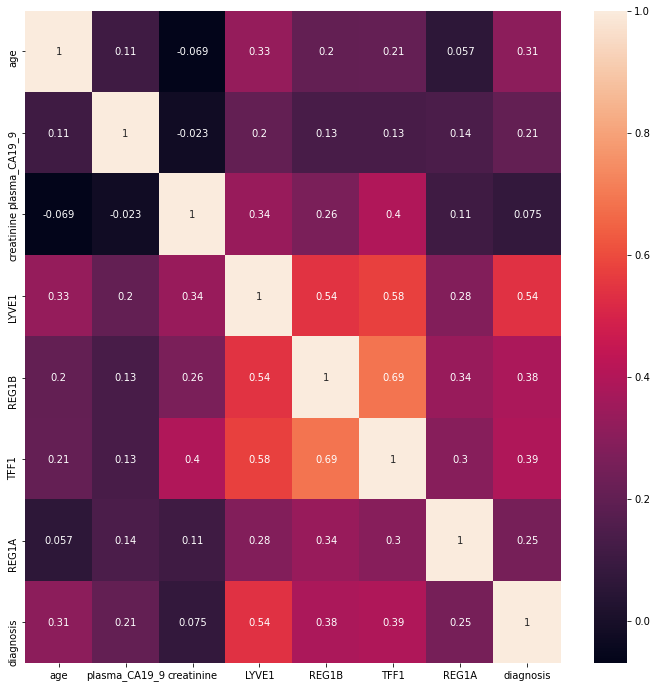

In [8]:
fig,ax=plt.subplots(figsize=(12,12))
sns.heatmap(d.corr(),annot=True)

Acoording to this heatmap, we can see that REG1B and TFF1 is closely positively correlated.

    
Then, positive correlation occurs between TFF1 and LYVE1.
    
Then, positive correlation occurs between REG1B and LYVE1.

Then, positive correlation occurs between diagnosis and LYVE1.

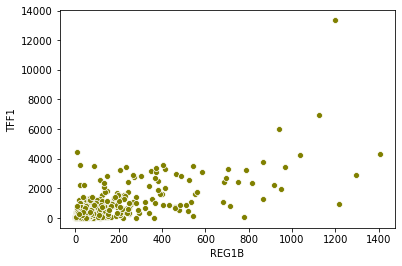

In [9]:
sns.scatterplot(x='REG1B',y='TFF1',data=d,color='olive')

TFF1 ng/ml: Urinary levels of Trefoil Factor 1, which may be related to regeneration and repair of the urinary tract


REG1B ng/ml:Urinary levels of a protein that may be associated with pancreas regeneration

As REG 1B is increasing, we can see that Trefoil factor 1 increases but then remains almost at a certain level.

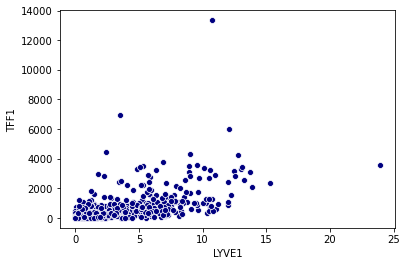

In [10]:
sns.scatterplot(x='LYVE1',y='TFF1',data=d,color='navy')

LYVE1 ng/ml: Urinary levels of Lymphatic vessel endothelial hyaluronan receptor 1, a protein that may play a role in tumor metastasis(metastasis-spread of cancer to other parts of body.)

TFF1 ng/ml: Urinary levels of Trefoil Factor 1, which may be related to regeneration and repair of the urinary tract

As LYVE1 increases, you can see that, TFF1 remains at a steady rate.

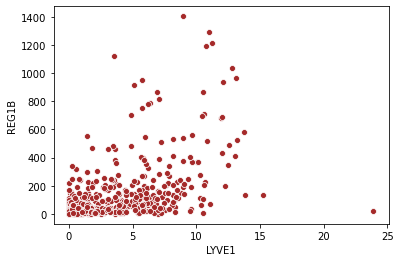

In [11]:
sns.scatterplot(x='LYVE1',y='REG1B',data=d,color='brown')

LYVE1 ng/ml: Urinary levels of Lymphatic vessel endothelial hyaluronan receptor 1, a protein that may play a role in tumor metastasis(metastasis-spread of cancer to other parts of body.)
    
REG1B ng/ml:Urinary levels of a protein that may be associated with pancreas regeneration
    
    As LYVE1 increases, we can see spread a clustered data increase till 400 for REG1B, and then some outliers.

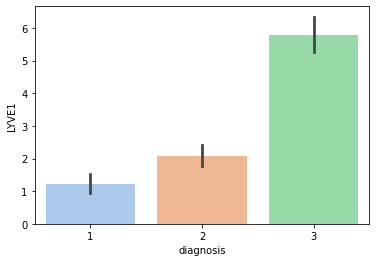

In [12]:
sns.barplot(x='diagnosis',y='LYVE1',data=d,palette='pastel')

LYVE1 ng/ml: Urinary levels of Lymphatic vessel endothelial hyaluronan receptor 1, a protein that may play a role in tumor metastasis(metastasis-spread of cancer to other parts of body.)
    
Diagnosis (1=Control, 2=Benign, 3=PDAC): 1 = control (no pancreatic disease), 2 = benign hepatobiliary disease (119 of which are chronic pancreatitis), 3=  pancreatic ductal adenocarcinoma

poeple who have pancreatic cancer tends to have higher values of LYVE1.

(array([186., 167., 117.,  58.,  29.,  18.,   9.,   2.,   3.,   1.]),
 array([0.05655 , 0.462579, 0.868608, 1.274637, 1.680666, 2.086695,
        2.492724, 2.898753, 3.304782, 3.710811, 4.11684 ]),
 <a list of 10 Patch objects>)

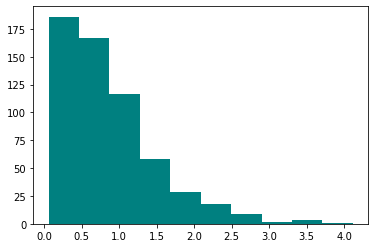

In [4]:
plt.hist(x='creatinine',data=d,color='teal')

Creatinine mg/ml:Urinary biomarker of kidney function

The creatinine levels seem to be most common in the ranges of 0 to 1.Normal is around 0.5 to 1.5

(array([ 19.,  19.,  48.,  84.,  88.,  97., 111.,  70.,  42.,  12.]),
 array([26. , 32.3, 38.6, 44.9, 51.2, 57.5, 63.8, 70.1, 76.4, 82.7, 89. ]),
 <a list of 10 Patch objects>)

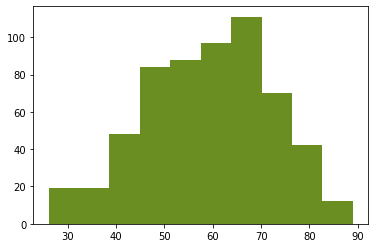

In [14]:
plt.hist(x='age',data=d,color='olivedrab')

The most common age groups occured in this dataset is 65-70

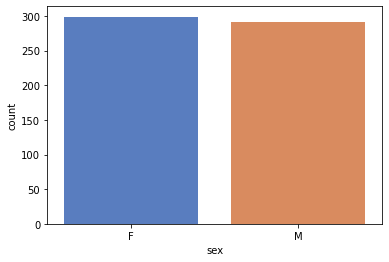

In [15]:
sns.countplot(x='sex',data=d,palette='muted')

The total number of males and females in this study is almost the same , with female count slightly higher than male count.

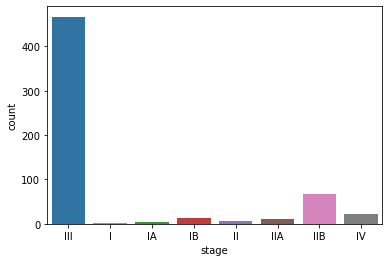

In [16]:
sns.countplot(x='stage',data=d)

Most people in this dataset seems to have 3rd stage  of pancreatic cancer.

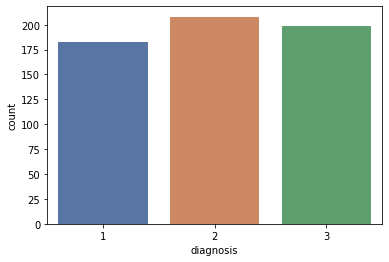

In [17]:
sns.countplot(x='diagnosis',data=d,palette='deep')

Diagnosis (1=no disease, 2=Benign, 3=PDAC(pancreatic cancer))

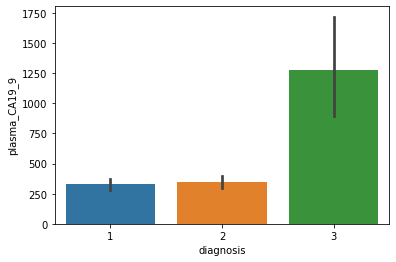

In [25]:
sns.barplot(x='diagnosis',y='plasma_CA19_9',data=d)

People with pancreatic cancer will have a really high levels of plasma.

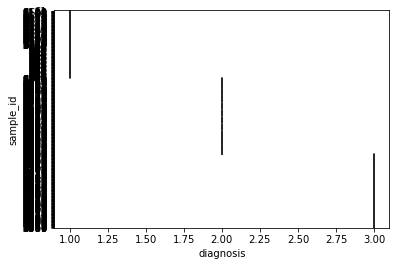

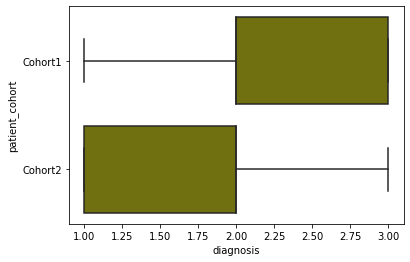

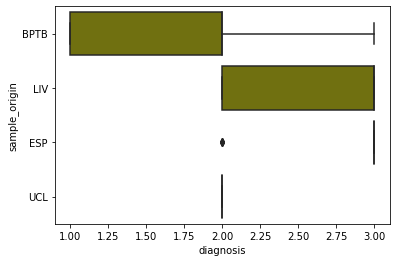

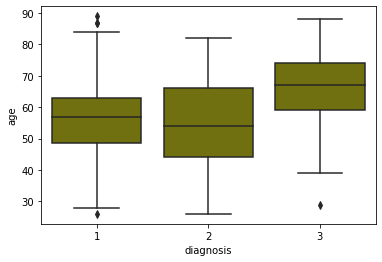

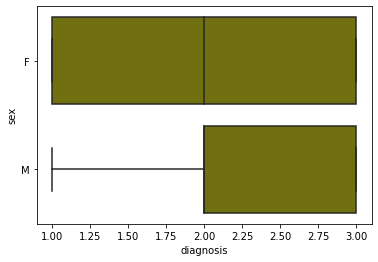

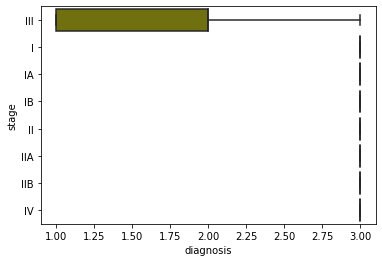

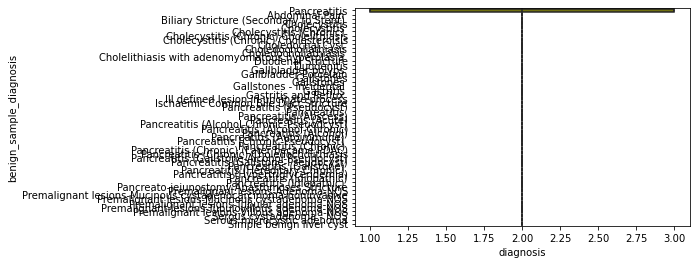

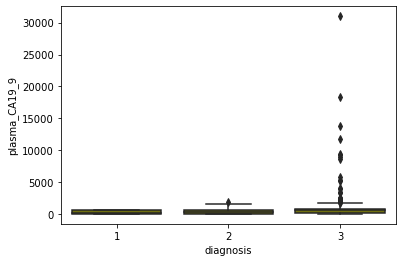

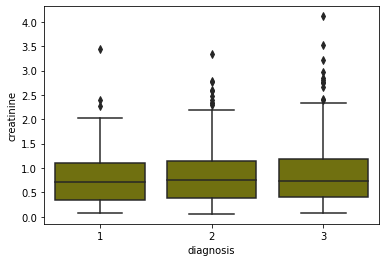

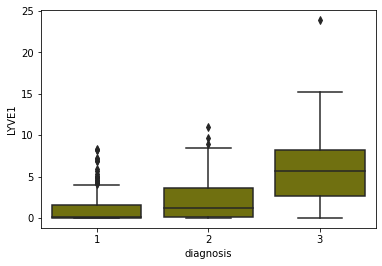

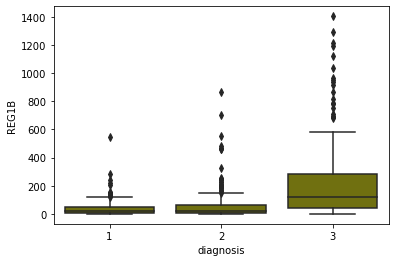

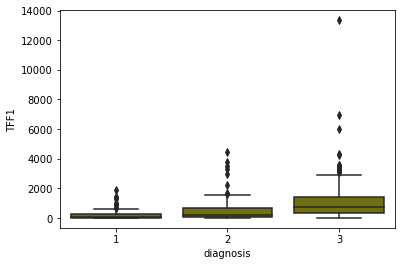

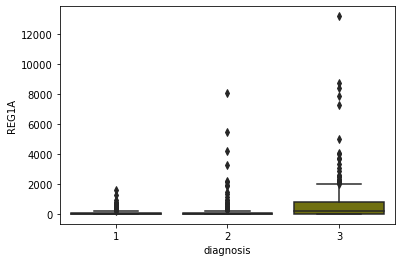

In [21]:
cols =d.columns
size = len(cols) - 1 # We don't need the target attribute
# x-axis has target attributes to distinguish between classes


x = cols[size]
y = cols[0:size]

for i in range(0, size):
    sns.boxplot(data=d, x=x, y=y[i],color='olive')
    plt.show()